# Plant Disease Prediction

This notebook demonstrates how to load the trained model and make predictions on new images.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import json
import os

## 1. Load Model and Class Indices

In [4]:
model = tf.keras.models.load_model('plant_disease_model.h5')

with open('class_indices.json', 'r') as f:
    class_names = json.load(f)

# Convert keys to integers if they were saved as strings
class_names = {int(k): v for k, v in class_names.items()}

2025-11-23 00:09:42.851543: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-23 00:09:42.851705: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-23 00:09:42.851710: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-23 00:09:42.851909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-23 00:09:42.851936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 2. Prediction Function

In [7]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    confidence = np.max(predictions)

    predicted_class_name = class_names[predicted_class_index]

    print(f"Predicted Class: {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}")


## 3. Test on an Image

In [10]:
# Example usage: Replace with a path to an image from the test set
test_image_path = 'dataset/test/test/Tomato___Early_blight/0a0a7e58-f9aa-4286-b92c-26892c68600d.JPG' # Check if this file exists or pick another one
# You can list files in the test directory to find one
# os.listdir('dataset/test/test')

# predict_image(test_image_path)

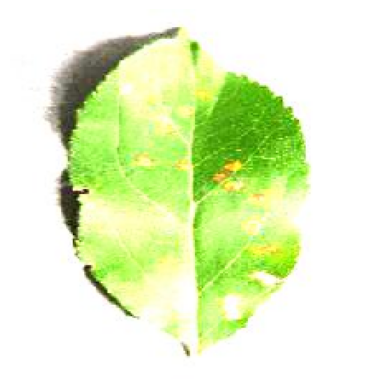

2025-11-23 00:13:41.280642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Apple___Cedar_apple_rust
Confidence: 1.00


In [12]:
predict_image('/Users/somtomar/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/AppleCedarRust1.JPG')

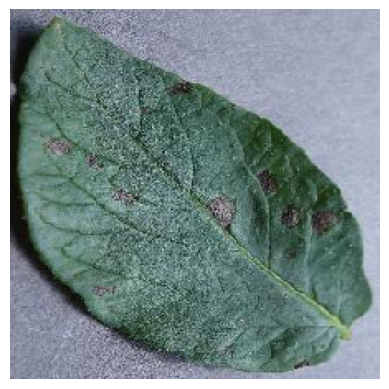

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Predicted Class: Potato___healthy
Confidence: 1.00


In [14]:
predict_image('/Users/somtomar/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/PotatoEarlyBlight3.JPG')

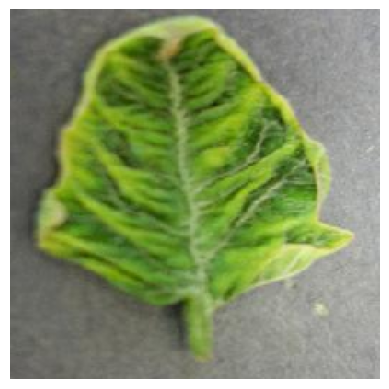

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Confidence: 1.00


In [16]:
predict_image('/Users/somtomar/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/TomatoYellowCurlVirus6.JPG')

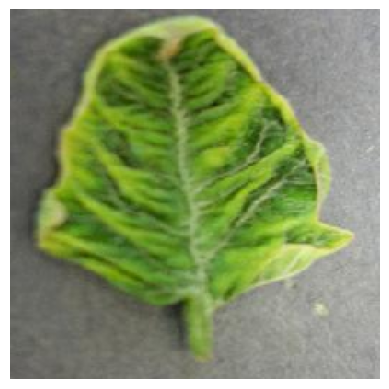

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Confidence: 1.00


In [18]:
predict_image('/Users/somtomar/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test/TomatoYellowCurlVirus6.JPG')

In [29]:
from tensorflow.keras.models import load_model

model = load_model("plant_disease_model.h5")   # <-- your file name


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_path = "dataset/test"   # <-- change this

test_gen = ImageDataGenerator(rescale=1/255)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(128, 128),  # same image size as training
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 33 images belonging to 1 classes.


In [36]:
test_loss, test_acc = model.evaluate(test_data)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 86528, but received input with shape (None, 25088)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>